# Week 6: Recommender Systems

Recommender systems can be useful for e-commerce and other applications such as music, video, or other services. Although we can use complex mathematic methods and algorithms to create recommender systems, we can also use simple methods. Part of this FTE is inspired from materials [here](http://guidetodatamining.com/assets/guideChapters/DataMining-ch2.pdf). We will look at a few different distance metrics that can be used to find similar users (collaborative filtering).

# Load and explore data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

First, we'll create a dataframe with ratings of genres by people:

In [5]:
ratings = np.array([[4, 2],
                    [1, 4],
                    [1, 3]])
df = pd.DataFrame(data=ratings, columns = ['Action', 'Comedy'], index = ['Amy', 'Bill', 'Clark'])
df

,Action,Comedy
Amy,4,2
Bill,1,4
Clark,1,3


In this situation, we want to make a recommendation to Clark based on movies other people have seen (collaborative filtering).

We can see Bill and Clark have similar ratings and both like comedy, so we might be able to recommend a comedy to Clark that Bill has seen. We can look at how some of the different distance metrics can be used to measure similarity here.

Text(0, 0.5, 'Comedy')

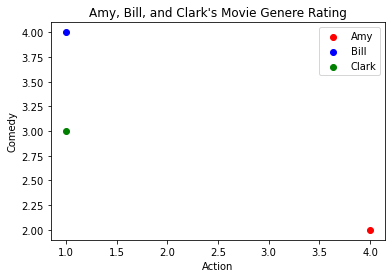

In [6]:
plt.scatter(df.loc['Amy', 'Action'], df.loc['Amy', 'Comedy'], color='Red', label='Amy')
plt.scatter(df.loc['Bill', 'Action'], df.loc['Bill', 'Comedy'], color='Blue', label='Bill')
plt.scatter(df.loc['Clark', 'Action'], df.loc['Clark', 'Comedy'], color='Green', label='Clark')
plt.legend()
plt.title("Amy, Bill, and Clark's Movie Genere Rating")
plt.xlabel('Action')
plt.ylabel('Comedy')

Now we can see visually that Bill and Clark's preferencs look similar.

# Euclidean distance

Euclidean distance measures the straight-line distance between two points. We can create our own function, but it's also available in scipy:

In [7]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)
    
from scipy.spatial.distance import euclidean

In [8]:
# Calculate the Euclidian distance between Amy and Clarke and Bill and Clark
print("Distance between Amy and Clark:", euclidean(df.loc['Amy'], df.loc['Clark']))
print("Distance bewteen Bill and Clark:", euclidean(df.loc['Bill'], df.loc['Clark']))

Distance between Amy and Clark: 3.1622776601683795
Distance bewteen Bill and Clark: 1.0


We can now see quantitatively how the distance between Bill and Clark is shorter than between Amy and Clark, so Bill is a more similar person in this dataset. One problem with this is Euclidean distance depends on the magnitudes of each individual part of the vector. E.g. if instead of ratings, this was number of movies watched, the Euclidean distance might not be such a great distance metric. Another metric that is scale-invariant is cosine similarity or cosine distance.

# Cosine distance or similarity

Cosine similarity and distance both range from 0 to 1, but similarity is 1 when the vectors are identical and 0 when the vectors are orthogonal (at a right angle). Distance is 1 - similarity.

The function from scipy is the cosine distance, as we can see from the [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine).

In [9]:
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.sqrt(np.dot(vector1, vector1)) * np.sqrt(np.dot(vector2, vector2)))

from scipy.spatial.distance import cosine

In [10]:
print("Cosine between Amy and Clark:", cosine(df.loc['Amy'], df.loc['Clark']), "\n",
      "Cosine between Bill and Clark:", cosine(df.loc['Bill'], df.loc['Clark']))

Cosine between Amy and Clark: 0.29289321881345254 
 Cosine between Bill and Clark: 0.002945514498418511


A smaller cosine distance means the vectors are more similar. So again, Bill and Clark look more similar than Amy and Clark.

Let's include more dimentions to the matrix (more movie generes) and build another recommender for Clark.

In [11]:
ratings = np.array([[4, 2, 5, 4, 3],
                    [1, 4, 3, 5, 2],
                    [1, 3, 2, 3, 1]])
df = pd.DataFrame(ratings, columns = ['Action', 'Comedy', 'Romance', 'Sci-Fi', 'Drama'], index = ['Amy', 'Bill', 'Clark'])
df

,Action,Comedy,Romance,Sci-Fi,Drama
Amy,4,2,5,4,3
Bill,1,4,3,5,2
Clark,1,3,2,3,1


Now that we have added more dimentions (movie generes), is Clark's movie preference still more similar to Bill's than Amy's?  Even though we have more dimentions to our data, the Euclidian distance and cosine similarity calculations are the same.

In [12]:
# Calculate the Euclidian distance between Amy and Clarke and Bill and Clark with more dimentional data
print("Distance between Amy and Clark:", euclidean(df.loc['Amy'], df.loc['Clark']))
print("Distance bewteen Bill to Clark:", euclidean(df.loc['Bill'], df.loc['Clark']))

Distance between Amy and Clark: 4.898979485566356
Distance bewteen Bill to Clark: 2.6457513110645907


In [13]:
# Calculate the cosine simularity distance between Amy and Clarke and Bill and Clark with more dimentional data
print("Cosine between Amy and Clark:", cosine(df.loc['Amy'], df.loc['Clark']))
print("Cosine between Bill and Clark:", cosine(df.loc['Bill'], df.loc['Clark']))

Cosine between Amy and Clark: 0.1460874361700335
Cosine between Bill and Clark: 0.009132611386275413


The Euclidian distance and cosine similartiy still agree that Clark's genere preference is closer to Bill's than Amy's

# Pearson correlation

Another way to measure similarily is with Pearson correlation, which we've already seen a few times. This measures the amount that two variables are linearly related - a positive value of +1 means perfectly linearly correlated. That would mean both variables go up together in all cases. A -1 means perfectly negatively linearly correlated, meaning when one variable goes up, the other one always goes down by a proportional amount. A 0 means no linear correlation at all.

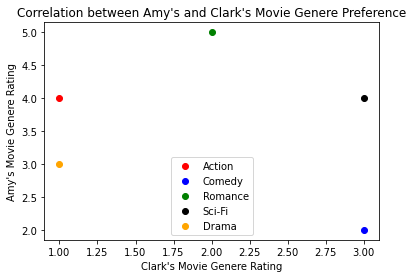

In [14]:
# Plot Amy's genere rating vs Clark's genere rating 
plt.scatter(df.loc['Clark','Action'], df.loc['Amy','Action'], color='Red', label='Action')
plt.scatter(df.loc['Clark','Comedy'], df.loc['Amy','Comedy'], color='Blue', label='Comedy')
plt.scatter(df.loc['Clark','Romance'], df.loc['Amy','Romance'], color='Green', label='Romance')
plt.scatter(df.loc['Clark','Sci-Fi'], df.loc['Amy','Sci-Fi'], color='Black', label='Sci-Fi')
plt.scatter(df.loc['Clark','Drama'], df.loc['Amy','Drama'], color='Orange', label='Drama')
plt.legend()
plt.title("Correlation between Amy's and Clark's Movie Genere Preference")
plt.xlabel("Clark's Movie Genere Rating")
plt.ylabel("Amy's Movie Genere Rating")
plt.show()

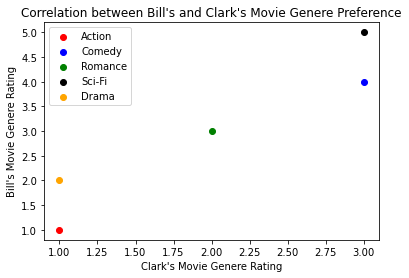

In [15]:
# Plot Bill's genere rating vs Clark's genere rating 
plt.scatter(df.loc['Clark', 'Action'], df.loc['Bill', 'Action'], color='Red', label='Action')
plt.scatter(df.loc['Clark', 'Comedy'], df.loc['Bill', 'Comedy'], color='Blue', label='Comedy')
plt.scatter(df.loc['Clark', 'Romance'], df.loc['Bill', 'Romance'], color='Green', label='Romance')
plt.scatter(df.loc['Clark', 'Sci-Fi'], df.loc['Bill', 'Sci-Fi'], color='Black', label='Sci-Fi')
plt.scatter(df.loc['Clark', 'Drama'], df.loc['Bill', 'Drama'], color='Orange', label='Drama')
plt.legend()
plt.title("Correlation between Bill's and Clark's Movie Genere Preference")
plt.xlabel("Clark's Movie Genere Rating")
plt.ylabel("Bill's Movie Genere Rating")
plt.show()

In [16]:
# Import the pearsonr funtion from the scipy.stats.stats library
from scipy.stats.stats import pearsonr

In [17]:
# Calulate the Pearson coefficent between each user and Clark
print("Pearson's Coefficient between Amy and Clark:", pearsonr(df.loc['Amy'], df.loc['Clark'])[0], "\n",
      "Pearson's Coefficient between Bill and Clark:", pearsonr(df.loc['Bill'], df.loc['Clark'])[0])

Pearson's Coefficient between Amy and Clark: -0.2192645048267573 
 Pearson's Coefficient between Bill and Clark: 0.9486832980505138


We can see how the plot of Bill vs Clark is very positively linear, while Amy vs Clark is slightly negative, which gives us the Pearson values as shown. 

Note: The second value returned from pearsonr is the p-value, which is a statistical measure that signifies how significant the correlation value is. As a rule of thumb, we usually take a p-value under 0.05 to mean it is statistically significant.

We could also use the function `np.corrcoef` to get the Pearson correlation.

# Creating simple recommender systems

## Creating a top-item recommender

One of the simplest recommender systems is to recommend the top-rated items. In our case, we can add up the ratings for each movie and recommend the top movies from that metric.

### Load the movielens dataset
We are using the movielens dataset from [here](https://grouplens.org/datasets/movielens/) (the small dataset from the education section).

In [18]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [19]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
pd.to_datetime(ratings['timestamp'], unit='s')

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

We are going to use a new pandas technique here called groupby. This groups our dataframe by a column, then allows us to take aggregations like the sum.

In [27]:
ratings.groupby('movieId').sum()

,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


Then we need to sort this from greatest to least. Lastly, it doesn't hurt to also see what the actual titles are.

In [28]:
ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False)

,userId,rating,timestamp
movieId,,,
318,95829,1404.0,376924839127
356,101385,1370.0,386165236681
296,90621,1288.5,349204311001
2571,85236,1165.5,350270041779
593,85535,1161.0,320035674330
...,...,...,...
160872,21,0.5,1468113939
8236,580,0.5,1167791433
57326,232,0.5,1241823595


One way to get the movie titles is to use our index to index the movie df. We can also merge the two on the movie id.

In [29]:
movies.set_index('movieId', inplace=True)

In [30]:
top_idx = ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False).index
movies.loc[top_idx]

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
356,Forrest Gump (1994),Comedy|Drama|Romance|War
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
...,...,...
160872,Satanic (2016),Horror
8236,While the City Sleeps (1956),Drama|Film-Noir
57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy


In [31]:
pd.concat([movies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)

,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN


It turns out a few movies in the movie df are not in the ratings df (this is a subset of the full dataset).

We now have our simple top-item recommender - we can recommend the top 5 or 10 overall-rated movies.

## Creating a simple collaborative filtering recommender

We can make this a bit more sophisticated by finding the most similar users to a given user, and making recommendations based on that. One strategy is to to recommend highly-rated items from similar users to our given user. We could also combine our top-item recommender system with this similar-user recommender system to make it more advanced.

Here, we will make recommendations for user 1 by finding the most similar users to user 1 and recommending movies user 1 has not rated.

We need to transform the ratings df to a "wide" format from "long" so that we can calculate similarities between users.

In [32]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You might use this, and sort the results to get most similar users by Pearson correlation. You can also pass different methods for the `method` argument of corr to use different distance calculations.

We can fill the missing values so as not to get NaN results from the calculation, although this greatly effects the calculations. Try it with and without filling missing values to see the difference. You could fill the missing values with -1, for example.

In [33]:
# wide.fillna(-1, inplace=True)

In [34]:
cor = wide.T.corr()

In [35]:
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


We can get the most similar users to user 1 like so: select user 1 with `loc[1]` then sort values from greatest to least.

In [36]:
cor.loc[1].sort_values(ascending=False)

userId
1      1.0
146    1.0
106    1.0
333    1.0
598    1.0
      ... 
538    NaN
545    NaN
547    NaN
556    NaN
578    NaN
Name: 1, Length: 610, dtype: float64

Check if two users have rated the same movies, then find the movies the first one has not watched from the second one.

In [37]:
wide.loc[1].notna().equals(wide.loc[146].notna())

False

We can get movies rated 5 by 146, but not rated by 1 - these could be recommendations. We use pandas filtering here to get these.

In [38]:
rated_5_by_146_not_watched_by_1 = (wide.loc[146] == 5) & (wide.loc[1].isna())
print(wide.loc[1][rated_5_by_146_not_watched_by_1])
print(wide.loc[146][rated_5_by_146_not_watched_by_1])

movieId
32      NaN
30803   NaN
Name: 1, dtype: float64
movieId
32       5.0
30803    5.0
Name: 146, dtype: float64


We can also use Euclidean or cosine distances to calculate similarities. For these and other numpy calculations, we cannot have missing values.

We can use our same corr function, but change the method to our Euclidean or cosine distance. However, that takes longer to calculate than using the pdist function from scipy.

In [39]:
wide.fillna(-1, inplace=True)

In [40]:
euclidean(wide.iloc[1], wide.iloc[146])

33.91902121229326

In [41]:
from scipy.spatial.distance import pdist, squareform

In [42]:
euclidean_distances = squareform(pdist(wide, metric=euclidean)) # or metric='euclidean'

In [43]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [44]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


Of course, the distance between a point and itself is 0, so the diagonal is 0s. We can then get the most similar users to user 1:

In [45]:
euclidean_df.loc[1].sort_values()

userId
1        0.000000
493     80.851716
39      81.357237
494     81.767964
164     81.841310
          ...    
448    171.276823
610    179.904836
599    181.565415
474    203.798921
414    224.808252
Name: 1, Length: 610, dtype: float64

In [46]:
euclidean_df.loc[1].sort_values().loc[146]

85.64899298882627

We can see the user that was most similar by Pearson correlation is not the same as Euclidean distance. Let's check cosine distance as well.

In [47]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[1].sort_values()

userId
1      0.000000
39     0.256315
493    0.257912
96     0.262586
164    0.265731
         ...   
448    0.741735
610    0.774839
599    0.810149
474    0.862710
414    0.917347
Name: 1, Length: 610, dtype: float64

We can see here that the top 2 most similar users are the same between cosine and Euclidean distance, but not Pearson correlation.

In [48]:
cosine_df.loc[1].sort_values().loc[146]

0.2944685362405085

## More EDA

We can do some more EDA and analysis of the data. For example, here is how to get user 1's top movie title.

In [49]:
print(wide.loc[1].max())
print(wide.loc[1].argmax())

5.0
43


In [50]:
# gets the column name for one of user 1's top movies, which is the movie ID
wide.columns[43]

47

In [51]:
movies.loc[47]

title     Seven (a.k.a. Se7en) (1995)
genres               Mystery|Thriller
Name: 47, dtype: object

We can also use pandas filtering to see how many other users rated this a 5 like user 1.

In [52]:
ratings[(ratings['movieId'] == 47) & (ratings['rating'] == 5.0)]

,userId,movieId,rating,timestamp
3,1,47,5.0,964983815
1355,13,47,5.0,987895819
1392,14,47,5.0,835441133
7993,56,47,5.0,835799219
8522,58,47,5.0,847718657
9986,66,47,5.0,1093747353
15514,102,47,5.0,835876045
16218,105,47,5.0,1446571714
17915,112,47,5.0,1442535846
19590,126,47,5.0,845925822


There are more movies this person rated a 5 (their max):

In [53]:
wide.loc[1][wide.loc[1] == 5]

movieId
47      5.0
50      5.0
101     5.0
151     5.0
157     5.0
       ... 
3702    5.0
3703    5.0
3729    5.0
3793    5.0
5060    5.0
Name: 1, Length: 124, dtype: float64

Lastly, we can get their top movies like so:

In [54]:
wide.loc[1].sort_values(ascending=False)

movieId
2991      5.0
1220      5.0
1282      5.0
2291      5.0
2899      5.0
         ... 
4624     -1.0
4625     -1.0
4626     -1.0
4628     -1.0
193609   -1.0
Name: 1, Length: 9724, dtype: float64

# Optional Advanced Section: Using Python libraries for more advanced recommenders

There are several packges for recommenders in Python, but one of the top packages is surprise. We first need to install it with `conda install -c conda-forge scikit-surprise -y`. The docs for the package have instructions on how to use it as well, but we can use it with our movielens data like this.  There is a function here used from an example in the [documentation]() (which is also [here](https://github.com/NicolasHug/Surprise/blob/master/examples/top_n_recommendations.py)).

The first example in the documentation, shown below, simply evaluates the performance of an algorithm (here we are using SVD) on the data.

In [56]:
from surprise import SVD
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# path to dataset file
file_path = 'ratings.csv'

# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

data = Dataset.load_from_file(file_path, reader=reader)

cross_validate(SVD(), data, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8679  0.8758  0.8793  0.8742  0.8735  0.8741  0.0037  
MAE (testset)     0.6667  0.6703  0.6765  0.6713  0.6708  0.6711  0.0031  
Fit time          6.24    5.66    5.96    5.66    6.27    5.96    0.27    
Test time         0.18    0.17    0.24    0.18    0.25    0.20    0.03    


{'test_rmse': array([0.86789519, 0.87577966, 0.87932635, 0.87419708, 0.87349836]),
 'test_mae': array([0.66667247, 0.67026387, 0.67648711, 0.67132066, 0.6708006 ]),
 'fit_time': (6.239994287490845,
  5.66299295425415,
  5.963993549346924,
  5.65600061416626,
  6.268000841140747),
 'test_time': (0.1820065975189209,
  0.16900134086608887,
  0.23900222778320312,
  0.1780390739440918,
  0.24599885940551758)}

If we want to make predictions for users, it's significantly more complex.

In [57]:
training_data = data.build_full_trainset()
rec = SVD()
fitted = rec.fit(training_data)

We can make predictions for a single user and item like so, where uid is the user id and iid is the item id:

In [58]:
prediction = rec.predict(uid='1', iid='5')
prediction

Prediction(uid='1', iid='5', r_ui=None, est=3.6269992054758387, details={'was_impossible': False})

Then we can get the top predictions for a user like so, borrowing the function from the docs. Predicting on the whole dataset takes a bit to compute.

In [59]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [61]:
# gets predictions on entire dataset (I think, although not 100% sure)
testset = training_data.build_anti_testset()
predictions = rec.test(testset)

top_n = get_top_n(predictions)

top_user_1 = pd.DataFrame(data=top_n['1'], columns=['movieId', 'predicted_rating'])
top_user_1['movieId'] = top_user_1['movieId'].astype('int')
top_user_1.set_index('movieId', inplace=True)

top_user_1.merge(movies, left_index=True, right_index=True)

,predicted_rating,title,genres
movieId,,,
318,5,"Shawshank Redemption, The (1994)",Crime|Drama
720,5,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
898,5,"Philadelphia Story, The (1940)",Comedy|Drama|Romance
899,5,Singin' in the Rain (1952),Comedy|Musical|Romance
904,5,Rear Window (1954),Mystery|Thriller
7153,5,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
913,5,"Maltese Falcon, The (1941)",Film-Noir|Mystery
1148,5,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime
1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
